# Pacotes usados

In [1]:
!pip install BioPython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.9 MB/s eta 0:00:00


In [2]:
from Bio import Seq, SeqIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dados Usados

In [3]:
data_path = "/content/drive/MyDrive/AB/exercicio_3/data/IN Dengue 21 segmentos.fasta"

In [4]:
dna_strings = list(SeqIO.parse(data_path, "fasta"))

# Funções utilitárias

In [5]:
def count_atcg(string_dna: []):

  A = string_dna.count('A')
  T = string_dna.count('T')
  C = string_dna.count('C')
  G = string_dna.count('G')

  total_ATCG = A + T + C + G

  return (A, T, C, G, total_ATCG)

In [6]:
def calculate_gc_content(C, G, total_ATCG):

  return (((C + G) / total_ATCG) * 100)

In [7]:
def calculate_melting_point(GC_content, total_ATCG):

  return ((64.9 + (0.41 * GC_content)) - (500 / total_ATCG))

# Resultados

In [8]:
array_A = np.zeros(0)
array_T = np.zeros(0)
array_C = np.zeros(0)
array_G = np.zeros(0)
array_total_ATCG = np.zeros(0)
array_GC_content = np.zeros(0)
array_melting_point = np.zeros(0)


for i in range(len(dna_strings)):

  string_dna = dna_strings[i].format("fasta")


  A, T, C, G, total_ATCG = count_atcg(string_dna)
  GC_content = calculate_gc_content(C, G, total_ATCG)
  melting_point = calculate_melting_point(GC_content, total_ATCG)


  array_A = np.append(array_A, A)
  array_T = np.append(array_T, T)
  array_C = np.append(array_C, C)
  array_G = np.append(array_G, G)
  array_total_ATCG = np.append(array_total_ATCG, total_ATCG)
  array_GC_content = np.append(array_GC_content, GC_content)
  array_melting_point = np.append(array_melting_point, melting_point)

## Gráfico conteúdo GC x Melting point

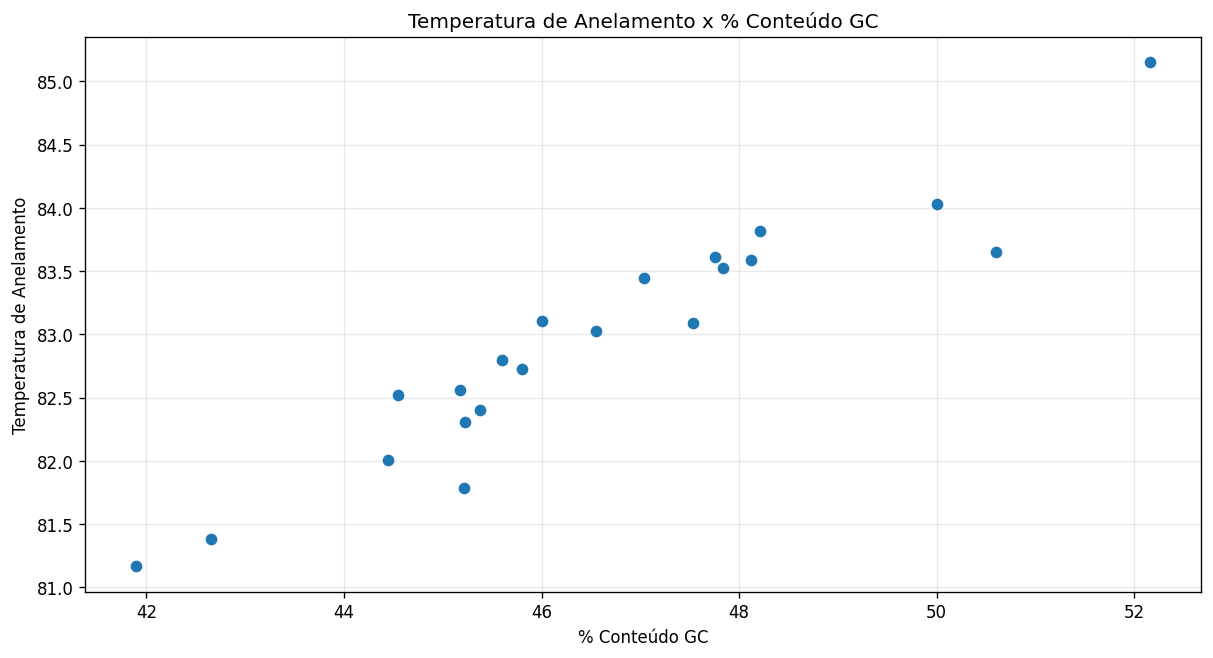

In [9]:
fig, ax = plt.subplots(figsize = (12, 6), dpi = 120, frameon = True)

plt.title("Temperatura de Anelamento x % Conteúdo GC")
plt.xlabel("% Conteúdo GC")
plt.ylabel("Temperatura de Anelamento")

plt.grid(which = 'major', axis = 'x', color = '#c9c9c9', alpha = 0.4, zorder = 0)
plt.grid(which = 'major', axis = 'y', color = '#c9c9c9', alpha = 0.4, zorder = 0)

ax.scatter(array_GC_content, array_melting_point, zorder = 2);

plt.savefig("/content/drive/MyDrive/AB/exercicio_3/data/grafico_conteudo_gc_x_temperatura_de_anelamento.png")

## Salva-se os resultados em arquivo .txt

In [10]:
file = open("/content/drive/MyDrive/AB/exercicio_3/data/exercicio_3_resultado.txt", "a")

file.write(f"Número de sequências de DNA: {len(dna_strings)}")
file.write("\n\n")

for i in range(len(dna_strings)):
  file.write(f"Segmento de DNA {(i + 1)}:")
  file.write("\n")
  file.write(f"A: {array_A[i]}")
  file.write("\n")
  file.write(f"T: {array_T[i]}")
  file.write("\n")
  file.write(f"C: {array_C[i]}")
  file.write("\n")
  file.write(f"G: {array_G[i]}")
  file.write("\n")
  file.write(f"ATCG Total: {array_total_ATCG[i]}")
  file.write("\n")
  file.write(f"% Conteúdo GC: {array_GC_content[i]}")
  file.write("\n")
  file.write(f"Temperatura de Anelamento: {array_melting_point[i]}")
  file.write("\n\n")


file.close()

## Cria-se a tabela com temperatura de anelamento para cada sequência e a salva em formato .xlsx

In [11]:
df_melting_point = pd.DataFrame({"Sequência": [], "Temperatura de Anelamento": []})

In [12]:
df_melting_point["Sequência"] = df_melting_point["Sequência"].astype("int")

In [13]:
for i in range(len(dna_strings)):
  df_melting_point.at[i, "Sequência"] = i + 1
  df_melting_point.at[i, "Temperatura de Anelamento"] = array_melting_point[i]

In [14]:
df_melting_point.to_excel("/content/drive/MyDrive/AB/exercicio_3/data/tabela_temperatura_de_anelamento.xlsx", index = False)